In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_path="../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

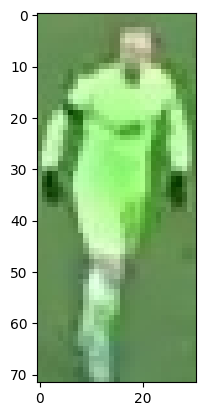

In [3]:
plt.imshow(image)
plt.show()

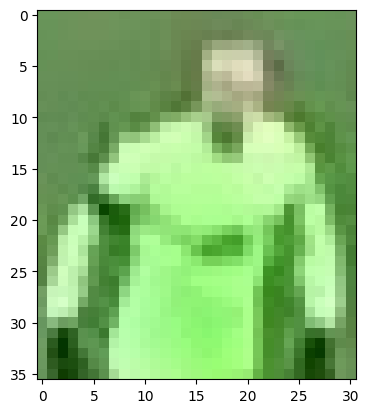

In [4]:
# take the top half of the image
top_half_image = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

Cluster the image into two clusters

In [7]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.cluster import KMeans

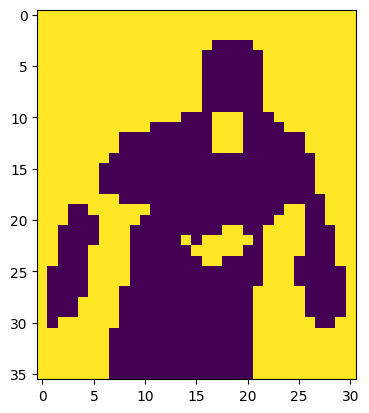

In [13]:
#Reshape the image into 2d array
image_2d = top_half_image.reshape(-1,3)

# perform K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

#get the cluster labels
labels = kmeans.labels_

#reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1] )

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [14]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key= corner_clusters.count)
print(non_player_cluster)

1


In [16]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [17]:
kmeans.cluster_centers_[player_cluster]

array([172.95      , 237.92708333, 147.95625   ])